In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

#import seaborn as sns
os.getcwd()

'/Users/Julek/Documents/licencjat/badanie/data/pilotaz1'

In [33]:
N=30
def GetData( file ):
	df = pd.read_csv(file)
	print(df.columns)
	del df['view_history']
	del df['rt']
	del df['trial_type']
	del df['trial_index']
	del df['time_elapsed']
	del df['internal_node_id']
	del df['subject']
	del df['phase']

	responses = df['responses'][1:2]

	del df['responses']

	df = df.ix[4:N+3]
	df = df.reset_index(drop=True)

	df['converted'] = [0]*N

	for i, val in enumerate(df['stimulus']):
		if (isinstance(val, str)):
			df.loc[i, 'stimulus'] = int(val[14:17])
			df.loc[i,'converted'] = 200 * (df['sim_score'][i]-1) / 99 + 7
	
	return df

In [10]:
DF=[[], [], [], [], []]
files = ['pilotaz'+str(i+1)+'.csv' for i in range(5)]
for index, file in enumerate(files):
    DF[index] = GetData(file).sort(['stimulus', 'converted'])
    
    
df = GetData('pilotaz5.csv')
df2 = df.sort(['stimulus', 'converted'])
print(DF)

Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')

/Users/Julek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Julek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)



Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
[    sim_score stimulus   converted
7        1.26        7    7.525253
3        4.97       10   15.020202
2        7.32       13   19.767677
24      17.10       19   39.525253
13      29.72       31   65.020202
18      29.47       37   64.515152
23      25.76       52   57.020202
27      50.00       55  105.989899
17      61.77       61  129.767677
9       83.31       79  173.282828
19      44.20       85   94.272727
26      55.83       88  117.767677
22      50.00      112  105.989899
20      50.00      121  105.989899
4       50.00      127  105.989899
10      86.77      130  180.272727
12      85.16      133  177.020202
5       97.78      139  202.515152
1       71.94      142  150.313131
0       87.76      145  182.272727
28      81.08      151  168.777778
6       97.91      154  202.777778
29  

In [4]:
REGR = [[],[],[],[],[]]
REGR_LOG = []
for i, dff in enumerate(DF):
    REGR[i] = LinearRegression().fit([[d] for d in dff['stimulus']], dff['converted'])
    #REGR.append(LinearRegression().fit([[np.log(d)] for d in dff['stimulus']], dff['converted']))
    dff['regr'] = [REGR[i].predict(s)[0] for s in df2['stimulus']]
    #dff['regr_log'] = [REGR_LOG[-1].predict(s)[0] for s in df2['stimulus']]

X = [[d] for d in df2['stimulus']]
Y = df2['converted']
regr = LinearRegression().fit(X, Y)
df2['regr'] = [regr.predict(s)[0] for s in df2['stimulus']]

#regr_log = LinearRegression().fit(np.log(X), Y)
#df2['regr_log'] = [regr_log.predict(np.log(s))[0] for s in df2['stimulus']]

In [8]:
REGR_LOG = [[],[],[],[],[]]

for i, dff in enumerate(DF):

    REGR_LOG[i] = LinearRegression().fit([[np.log(d)] for d in dff['stimulus']], dff['converted'])
    dff['regr_log'] = [REGR_LOG[i].predict(np.log(s))[0] for s in df2['stimulus']]
print (REGR_LOG[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


True

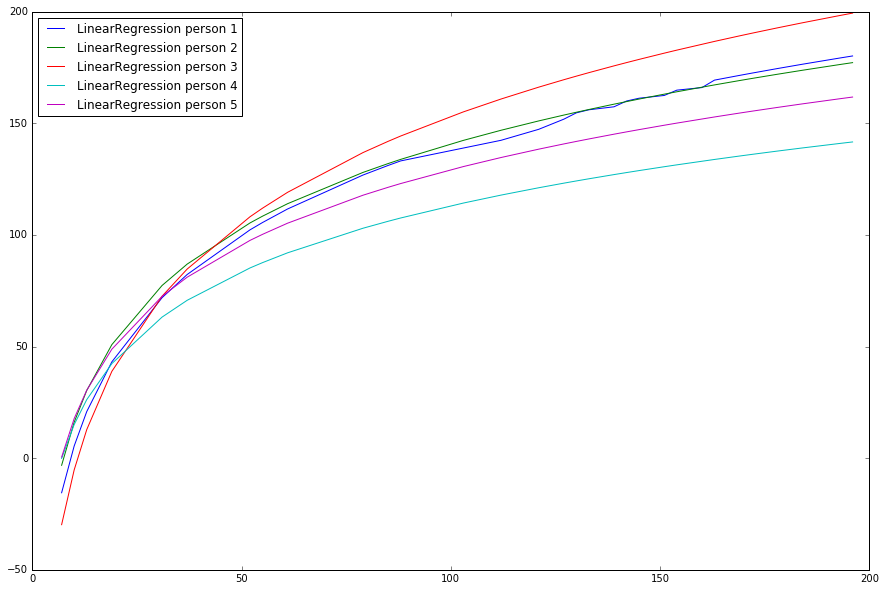

In [6]:
def DrawPlot2(DF):
    plt.figure(1, figsize=(15,10))
    for i, d in enumerate(DF):
        plt.plot(d['stimulus'], d['regr_log'], label='LinearRegression person '+str(i+1))
   
    plt.legend(loc='upper left')
    return True
DrawPlot2(DF)


Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')


/Users/Julek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


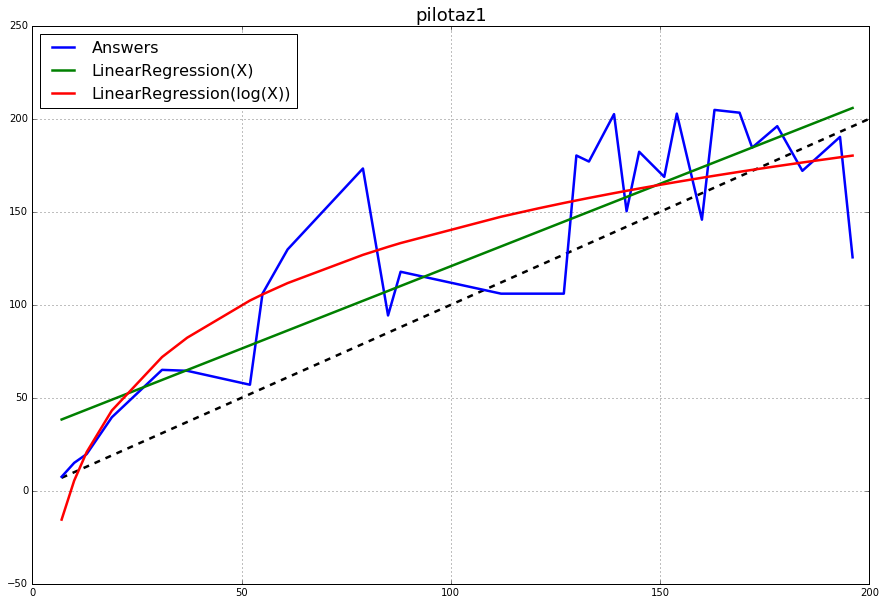

Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')


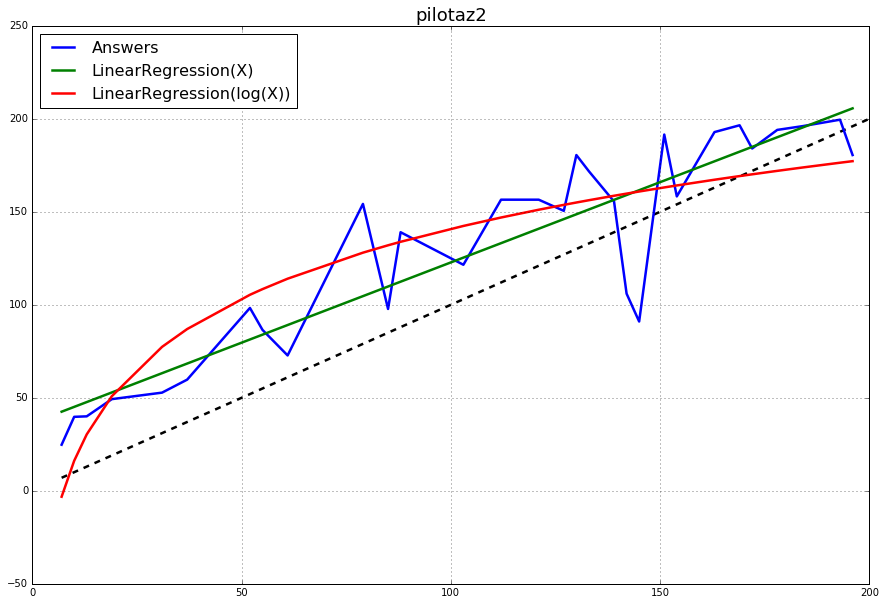

Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')


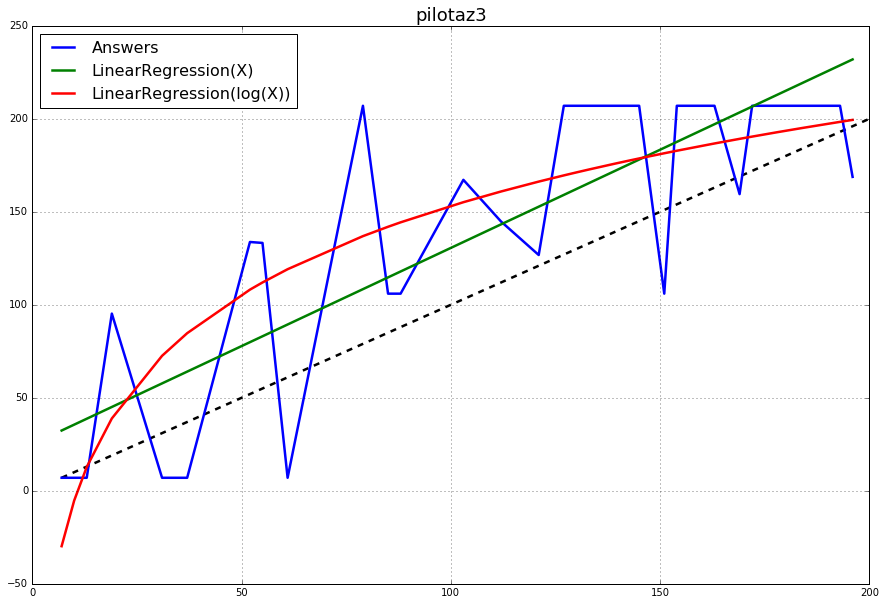

Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')


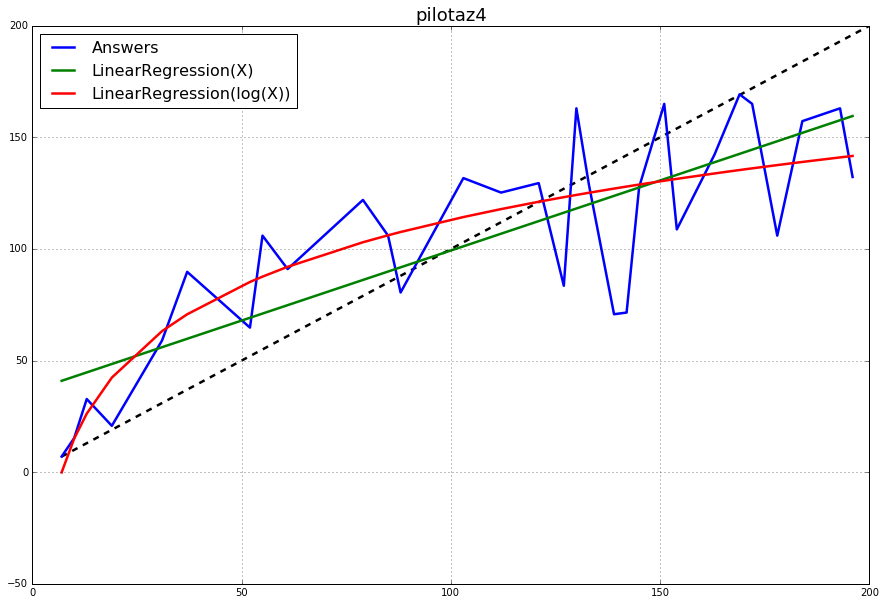

Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')


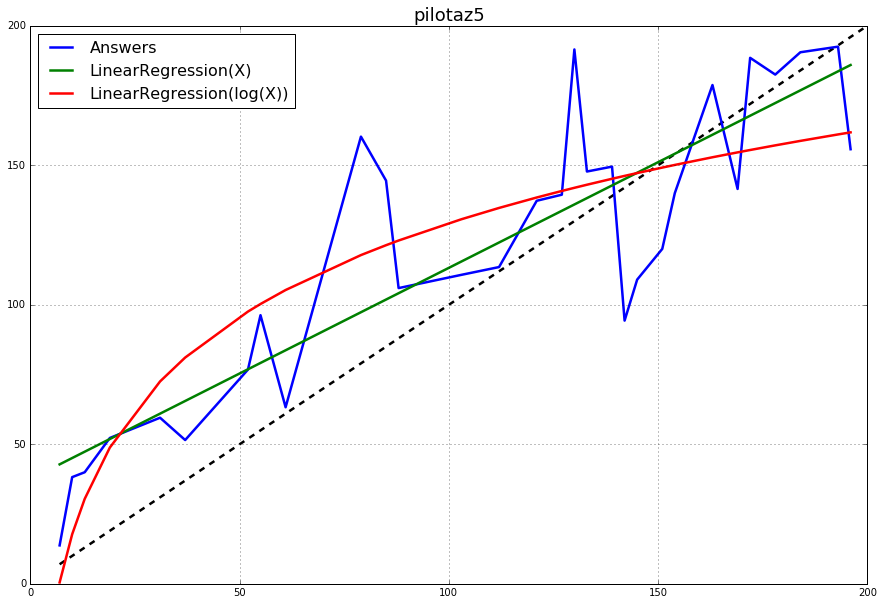

In [56]:
def DrawPlot(file):
    
    df = GetData(file+'.csv')
    df2 = df.sort(['stimulus', 'converted'])

    X = [[d] for d in df2['stimulus']]
    Y = df2['converted']
    regr = LinearRegression().fit(X, Y)
    df2['regr'] = [regr.predict(s)[0] for s in df2['stimulus']]

    regr_log = LinearRegression().fit(np.log(X), Y)
    df2['regr_log'] = [regr_log.predict(np.log(s))[0] for s in df2['stimulus']]
    
    plt.figure(1, figsize=(15,10))
    
    plt.plot([7, 200], [7,200], 'k--', linewidth=2.5)
    plt.plot(df2['stimulus'], df2['converted'],label="Answers", linewidth=2.5)
    plt.plot(df2['stimulus'], df2['regr'], label="LinearRegression(X)", linewidth=2.5)
    plt.plot(df2['stimulus'], df2['regr_log'], label="LinearRegression(log(X))", linewidth=2.5)
    
    plt.legend(loc='upper left', fontsize=16)
    plt.grid()
    plt.title(file, fontsize=18)
    plt.show()
    
    return True


for i in range(5):
    DrawPlot('pilotaz'+str(i+1))

1
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')
Index(['view_history', 'rt', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'subject', 'phase', 'responses', 'sim_score',
       'stimulus'],
      dtype='object')


/Users/Julek/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


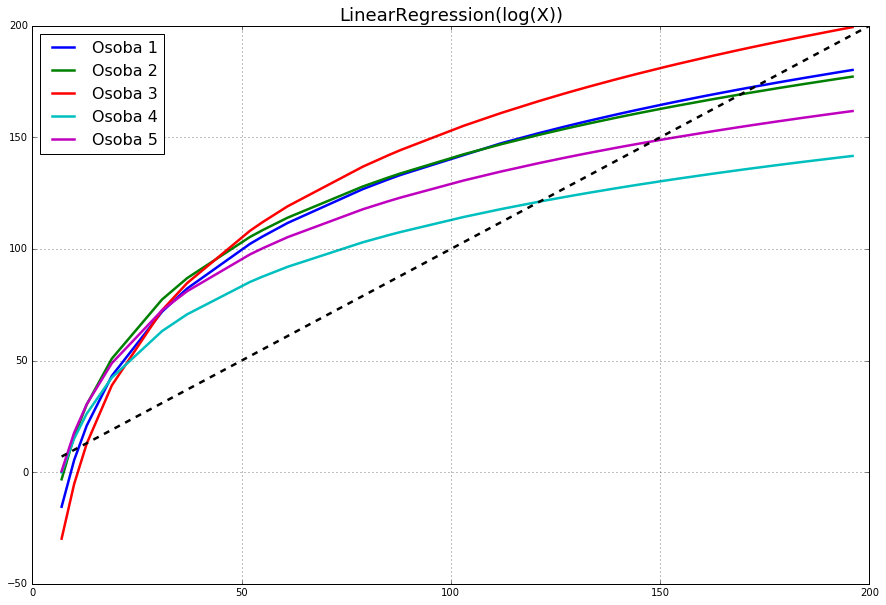

True

In [54]:
def DrawPlot3(a):
    
    print(a)
    plt.figure(1, figsize=(15,10))
    file = 'pilotaz'
    for i in range(5):
        
        df = GetData(file+str(i+1)+'.csv')
        
        df2 = df.sort(['stimulus', 'converted'])

        X = [[d] for d in df2['stimulus']]
        Y = df2['converted']
        regr = LinearRegression().fit(X, Y)
        df2['regr'] = [regr.predict(s)[0] for s in df2['stimulus']]

        regr_log = LinearRegression().fit(np.log(X), Y)
        df2['regr_log'] = [regr_log.predict(np.log(s))[0] for s in df2['stimulus']]
        plt.plot(df2['stimulus'], df2['regr_log'], label="Osoba "+str(i+1), linewidth=2.5)
        #plt.plot(df2['stimulus'], df2['converted'],label="Answers")
        #plt.plot(df2['stimulus'], df2['regr'], label="LinearRegression(X)")
    
    
    
    plt.plot([7, 200], [7,200], 'k--', linewidth=2.5)
    
    
    
    plt.legend(loc='upper left', fontsize=16)
    plt.grid()
    plt.title('LinearRegression(log(X))', fontsize=18)
    plt.show()
    
    return True



DrawPlot3(1)

In [ ]:
kf = cross_validation.KFold(N, n_folds=10, random_state=True)